In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dados = pd.read_csv("/content/sample_data/train.csv")
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(dados.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Eliminando colunas que não contribuem com o treinamento
dados = dados.drop(columns = ['PassengerId','Name','Ticket'])

In [6]:
valores_nulos = dados.isnull().sum()
print(dados.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [7]:
#Como mais de dois terços dos dados da coluna de cabine não contem valores acreditamos que o ideal seria descartalo
dados = dados.drop(columns = ['Cabin'])

In [8]:
#Acreditamos que as colunas de Parch e SibSp contem informações parecidas sendo mais útil e com objetico de reduzir a dimencionalidade torna-las uma única contendo a quantidade de familiares
dados['Family'] = dados['Parch'] + dados['SibSp']
dados.drop(columns = ['Parch','SibSp'],inplace =True)

In [9]:
#renomeando os valores da coluna Sex e Pclass afim de passar o hotenconder
Sex_dic = {
    "male":0,
    "female":1
}
dados["Sex"] = dados["Sex"].map(Sex_dic)

Pclass_dic={
    1:"Upper",
    2:"Middle",
    3:"Lower"
}
dados["Pclass"] = dados["Pclass"].map(Pclass_dic)

In [10]:
#quantidade de valores faltantes de idade para homens e mulheres
Man_Na = dados.loc[(dados['Age'].isnull()) & (dados.Sex==0)]
Woman_Na = dados.loc[(dados['Age'].isnull()) & (dados.Sex==1)]
Qtd_Man = Man_Na.shape[0]
Qtd_woman = Woman_Na.shape[0]
print(f"{Qtd_Man} {Qtd_woman}")

124 53


In [11]:
#Média de idade de homens e mulheres , cmo há uma diferencia razoável foi optado por fazer uma substituição por classe dos valores faltantes ,
man_mean = dados.loc[(dados.Sex==0)].Age.mean()
woman_mean = dados.loc[(dados.Sex==1)].Age.mean()
print(f"{man_mean} {woman_mean}")

30.72664459161148 27.915708812260537


In [12]:
# Preencher os valores NaN na coluna 'Age' com a média calculada porclasse
dados.loc[(dados['Age'].isna()) & (dados['Sex']==0), 'Age'] = math.trunc(man_mean)
dados.loc[(dados['Age'].isna()) & (dados['Sex']==1) , 'Age'] = math.trunc(woman_mean)

In [13]:
print(dados.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Family      0
dtype: int64


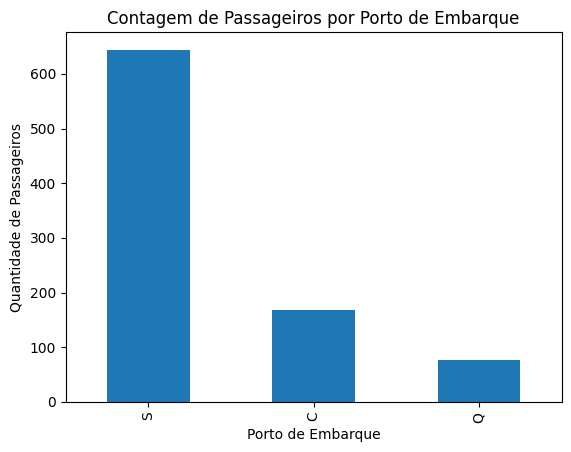

In [14]:
contagem_embarked = dados['Embarked'].value_counts()

# Crie um gráfico de barras para visualizar a contagem
contagem_embarked.plot(kind='bar')

# Adicione rótulos e título ao gráfico
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade de Passageiros')
plt.title('Contagem de Passageiros por Porto de Embarque')

# Exiba o gráfico
plt.show()

In [15]:
#devido a maior quantidade dentro do porto S os dois valores faltantes em embarked serão direcionados para S
dados['Embarked'].fillna("S", inplace=True)

In [16]:
print(dados.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64


In [17]:
#possivelmente esse grupo são os trabalhadores do titanic
class_especial = dados.loc[((dados["Embarked"] == "S") & (dados["Pclass"]=="Lower"))].shape[0]
print(f"{class_especial}")

353


In [18]:
dados = pd.get_dummies(dados, columns=['Pclass', 'Embarked'])

In [19]:
dados

,Survived,Sex,Age,Fare,Family,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,7.2500,1,1,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,1,1,0,0
2,1,1,26.0,7.9250,0,1,0,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,0,1
4,0,0,35.0,8.0500,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,13.0000,0,0,1,0,0,0,1
887,1,1,19.0,30.0000,0,0,0,1,0,0,1
888,0,1,27.0,23.4500,3,1,0,0,0,0,1
889,1,0,26.0,30.0000,0,0,0,1,1,0,0


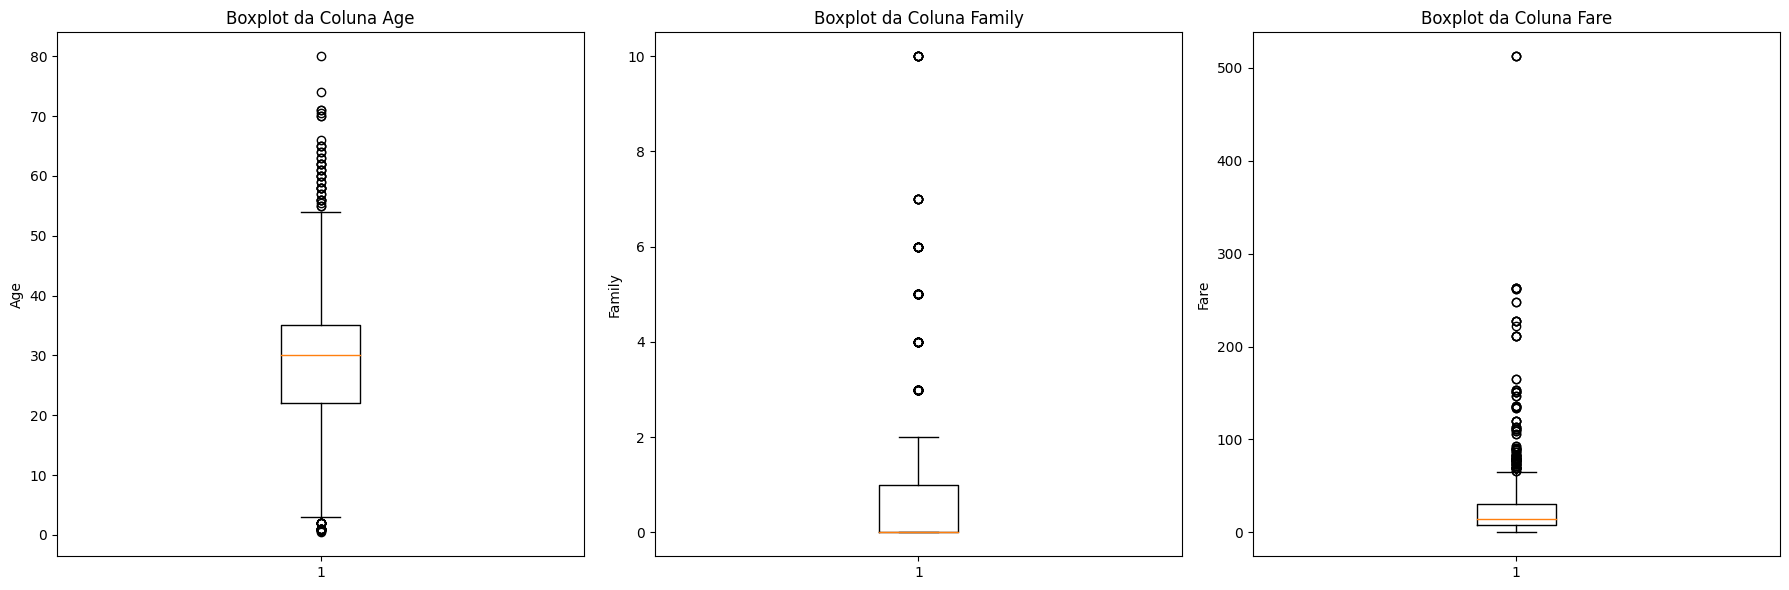

In [20]:
plt.figure(figsize=(18, 6))

# Boxplot para a coluna 'Age'
plt.subplot(1, 3, 1)
plt.boxplot(dados['Age'])
plt.title('Boxplot da Coluna Age')
plt.ylabel('Age')

# Boxplot para a coluna 'Family'
plt.subplot(1, 3, 2)
plt.boxplot(dados['Family'])
plt.title('Boxplot da Coluna Family')
plt.ylabel('Family')

# Boxplot para a coluna 'Fare'
plt.subplot(1, 3, 3)
plt.boxplot(dados['Fare'])
plt.title('Boxplot da Coluna Fare')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()


In [21]:
dados_filtered = dados.copy()
# Lidando com outliers na coluna 'Fare'
q1_fare = dados['Fare'].quantile(0.25)
q3_fare = dados['Fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare

dados_filtered['Fare'] = dados['Fare'].apply(lambda x: lower_bound_fare if x < lower_bound_fare else (upper_bound_fare if x > upper_bound_fare else x))

# Lidando com outliers na coluna 'family'
q1_family = dados['Family'].quantile(0.25)
q3_family = dados['Family'].quantile(0.75)
iqr_family = q3_family - q1_family
lower_bound_family = q1_family - 1.5 * iqr_family
upper_bound_family = q3_family + 1.5 * iqr_family

dados_filtered['Family'] = dados['Family'].apply(lambda x: lower_bound_family if x < lower_bound_family else (upper_bound_family if x > upper_bound_family else x))

# Lidando com outliers na coluna 'age'
q1_age = dados['Age'].quantile(0.25)
q3_age = dados['Age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

dados_filtered['Age'] = dados['Age'].apply(lambda x: lower_bound_age if x < lower_bound_age else (upper_bound_age if x > upper_bound_age else x))

# Agora, 'dados_filtered' contém as colunas 'Fare', 'Family' e 'Age' com outliers tratados, enquanto todas as outras colunas permanecem inalteradas.



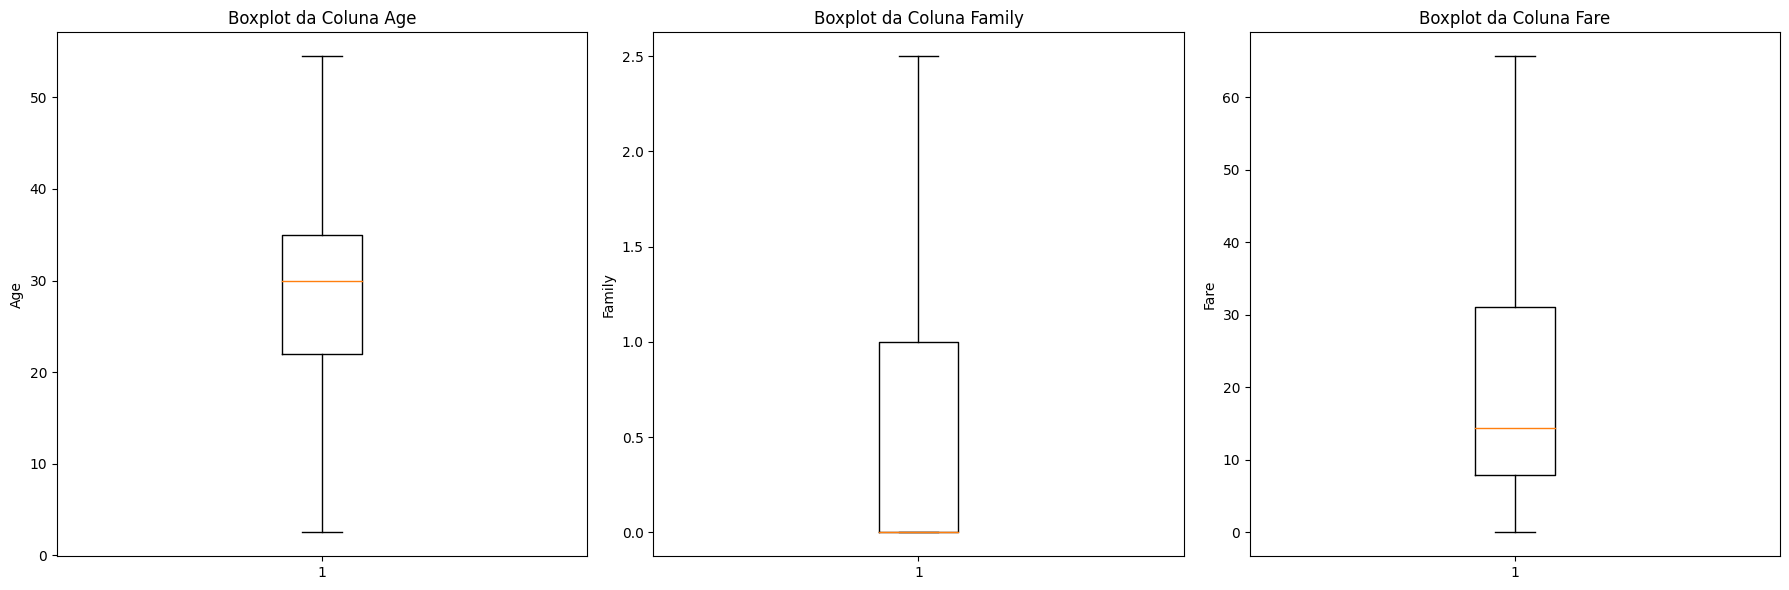

In [22]:
plt.figure(figsize=(18, 6))

# Boxplot para a coluna 'Age'
plt.subplot(1, 3, 1)
plt.boxplot(dados_filtered['Age'])
plt.title('Boxplot da Coluna Age')
plt.ylabel('Age')

# Boxplot para a coluna 'Family'
plt.subplot(1, 3, 2)
plt.boxplot(dados_filtered['Family'])
plt.title('Boxplot da Coluna Family')
plt.ylabel('Family')

# Boxplot para a coluna 'Fare'
plt.subplot(1, 3, 3)
plt.boxplot(dados_filtered['Fare'])
plt.title('Boxplot da Coluna Fare')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()


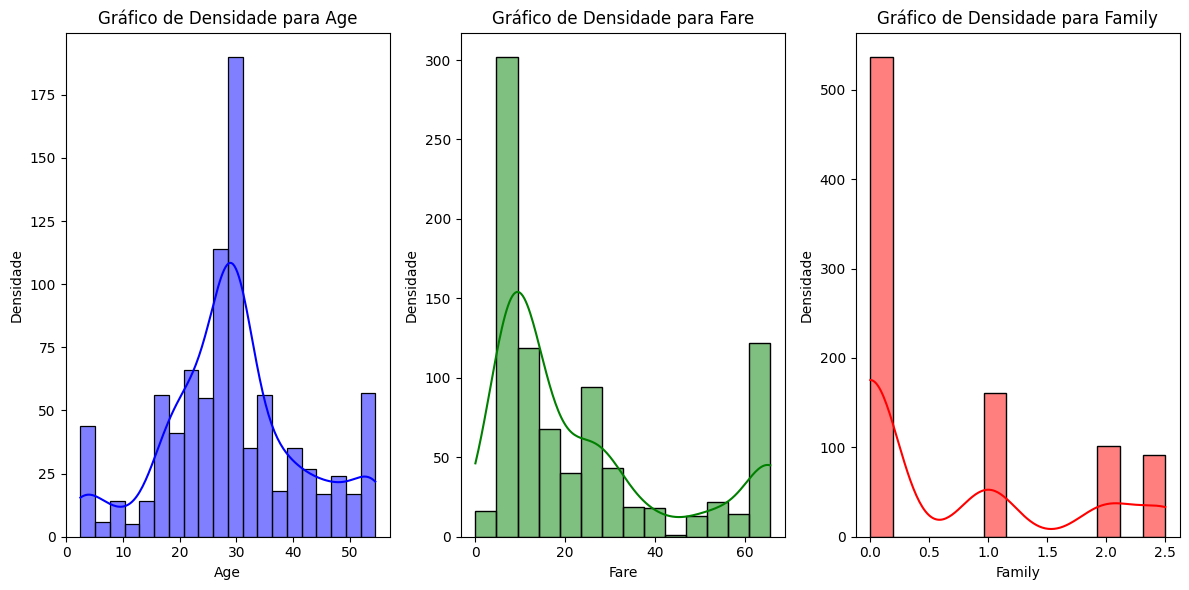

In [23]:
# Defina o tamanho da figura
plt.figure(figsize=(12, 6))

# Crie um subplot de grade 1x3 para os três gráficos de densidade
plt.subplot(1, 3, 1)
sns.histplot(dados_filtered['Age'], kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Age')

plt.subplot(1, 3, 2)
sns.histplot(dados_filtered['Fare'], kde=True, color='green')
plt.xlabel('Fare')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Fare')

plt.subplot(1, 3, 3)
sns.histplot(dados_filtered['Family'], kde=True, color='red')
plt.xlabel('Family')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Family')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [24]:
from imblearn.under_sampling import RandomUnderSampler


# Separar as colunas de alvo (y) e características (X)
y = dados_filtered.iloc[:, 0]  # Primeira coluna é o alvo
X = dados_filtered.iloc[:, 1:]  # Restantes colunas são características

# Criar uma instância do RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar o Random Undersampling aos dados
X_resampled, y_resampled = rus.fit_resample(X, y)

# Criar um novo DataFrame com os dados balanceados
dados_balanceados = pd.concat([y_resampled, X_resampled], axis=1)


In [25]:
dados_balanceados

,Survived,Sex,Age,Fare,Family,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
0,0,1,26.0,26.0000,2.0,0,1,0,0,0,1
1,0,0,54.0,65.6344,1.0,0,0,1,0,0,1
2,0,0,30.0,23.4500,2.5,1,0,0,0,0,1
3,0,1,45.0,27.9000,2.5,1,0,0,0,0,1
4,0,1,54.5,10.5000,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
679,1,1,15.0,7.2250,0.0,1,0,0,1,0,0
680,1,1,54.5,65.6344,1.0,0,0,1,1,0,0
681,1,1,25.0,26.0000,1.0,0,1,0,0,0,1
682,1,1,19.0,30.0000,0.0,0,0,1,0,0,1


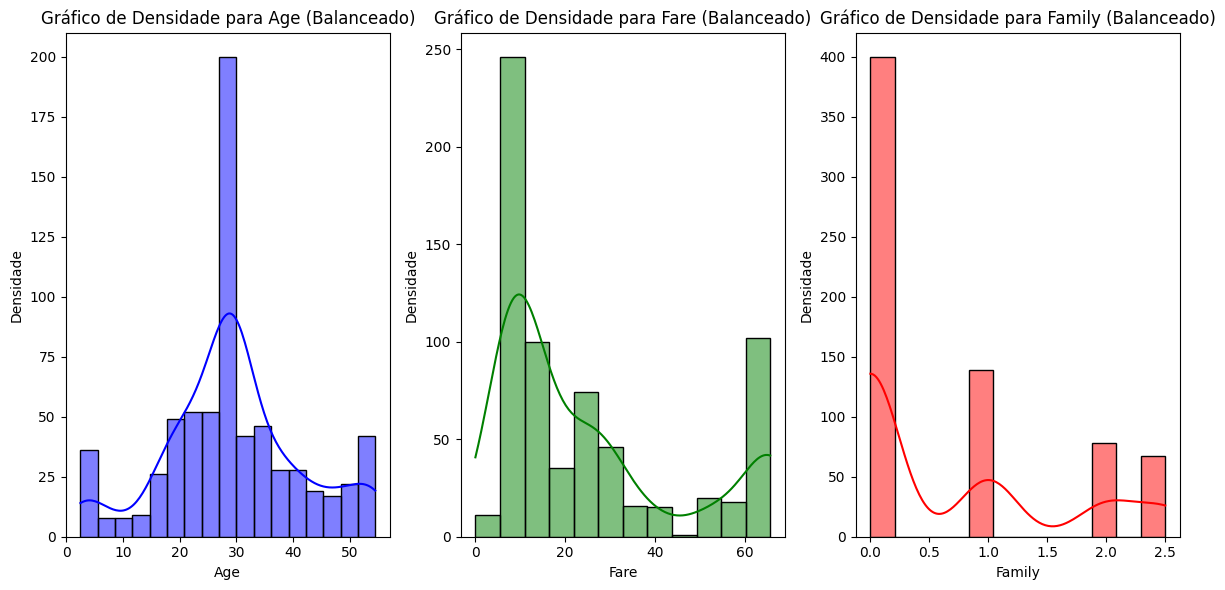

In [26]:
# Defina o tamanho da figura
plt.figure(figsize=(12, 6))

# Crie um subplot de grade 1x3 para os três gráficos de densidade
plt.subplot(1, 3, 1)
sns.histplot(dados_balanceados['Age'], kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Age (Balanceado)')

plt.subplot(1, 3, 2)
sns.histplot(dados_balanceados['Fare'], kde=True, color='green')
plt.xlabel('Fare')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Fare (Balanceado)')

plt.subplot(1, 3, 3)
sns.histplot(dados_balanceados['Family'], kde=True, color='red')
plt.xlabel('Family')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade para Family (Balanceado)')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()


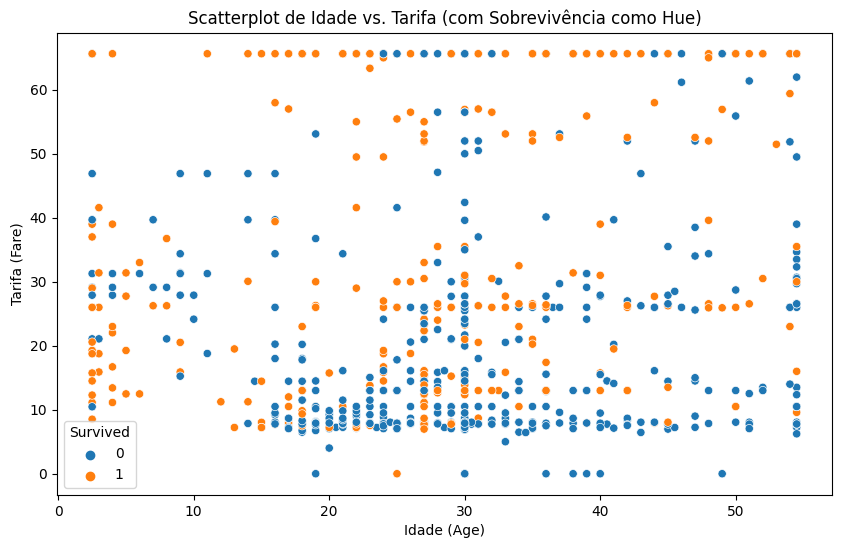

In [27]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura (opcional)

# Crie o scatterplot usando seaborn
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dados_filtered)

# Adicione rótulos aos eixos e título ao gráfico
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Scatterplot de Idade vs. Tarifa (com Sobrevivência como Hue)')

# Exiba o gráfico
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dados.iloc[:, 1:]  # Seleciona todas as colunas, exceto a primeira, para os recursos
Y = dados["Survived"]  # A variável de destino

# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)

# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

# Avalie o desempenho do modelo (por exemplo, usando a acurácia)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 0.77


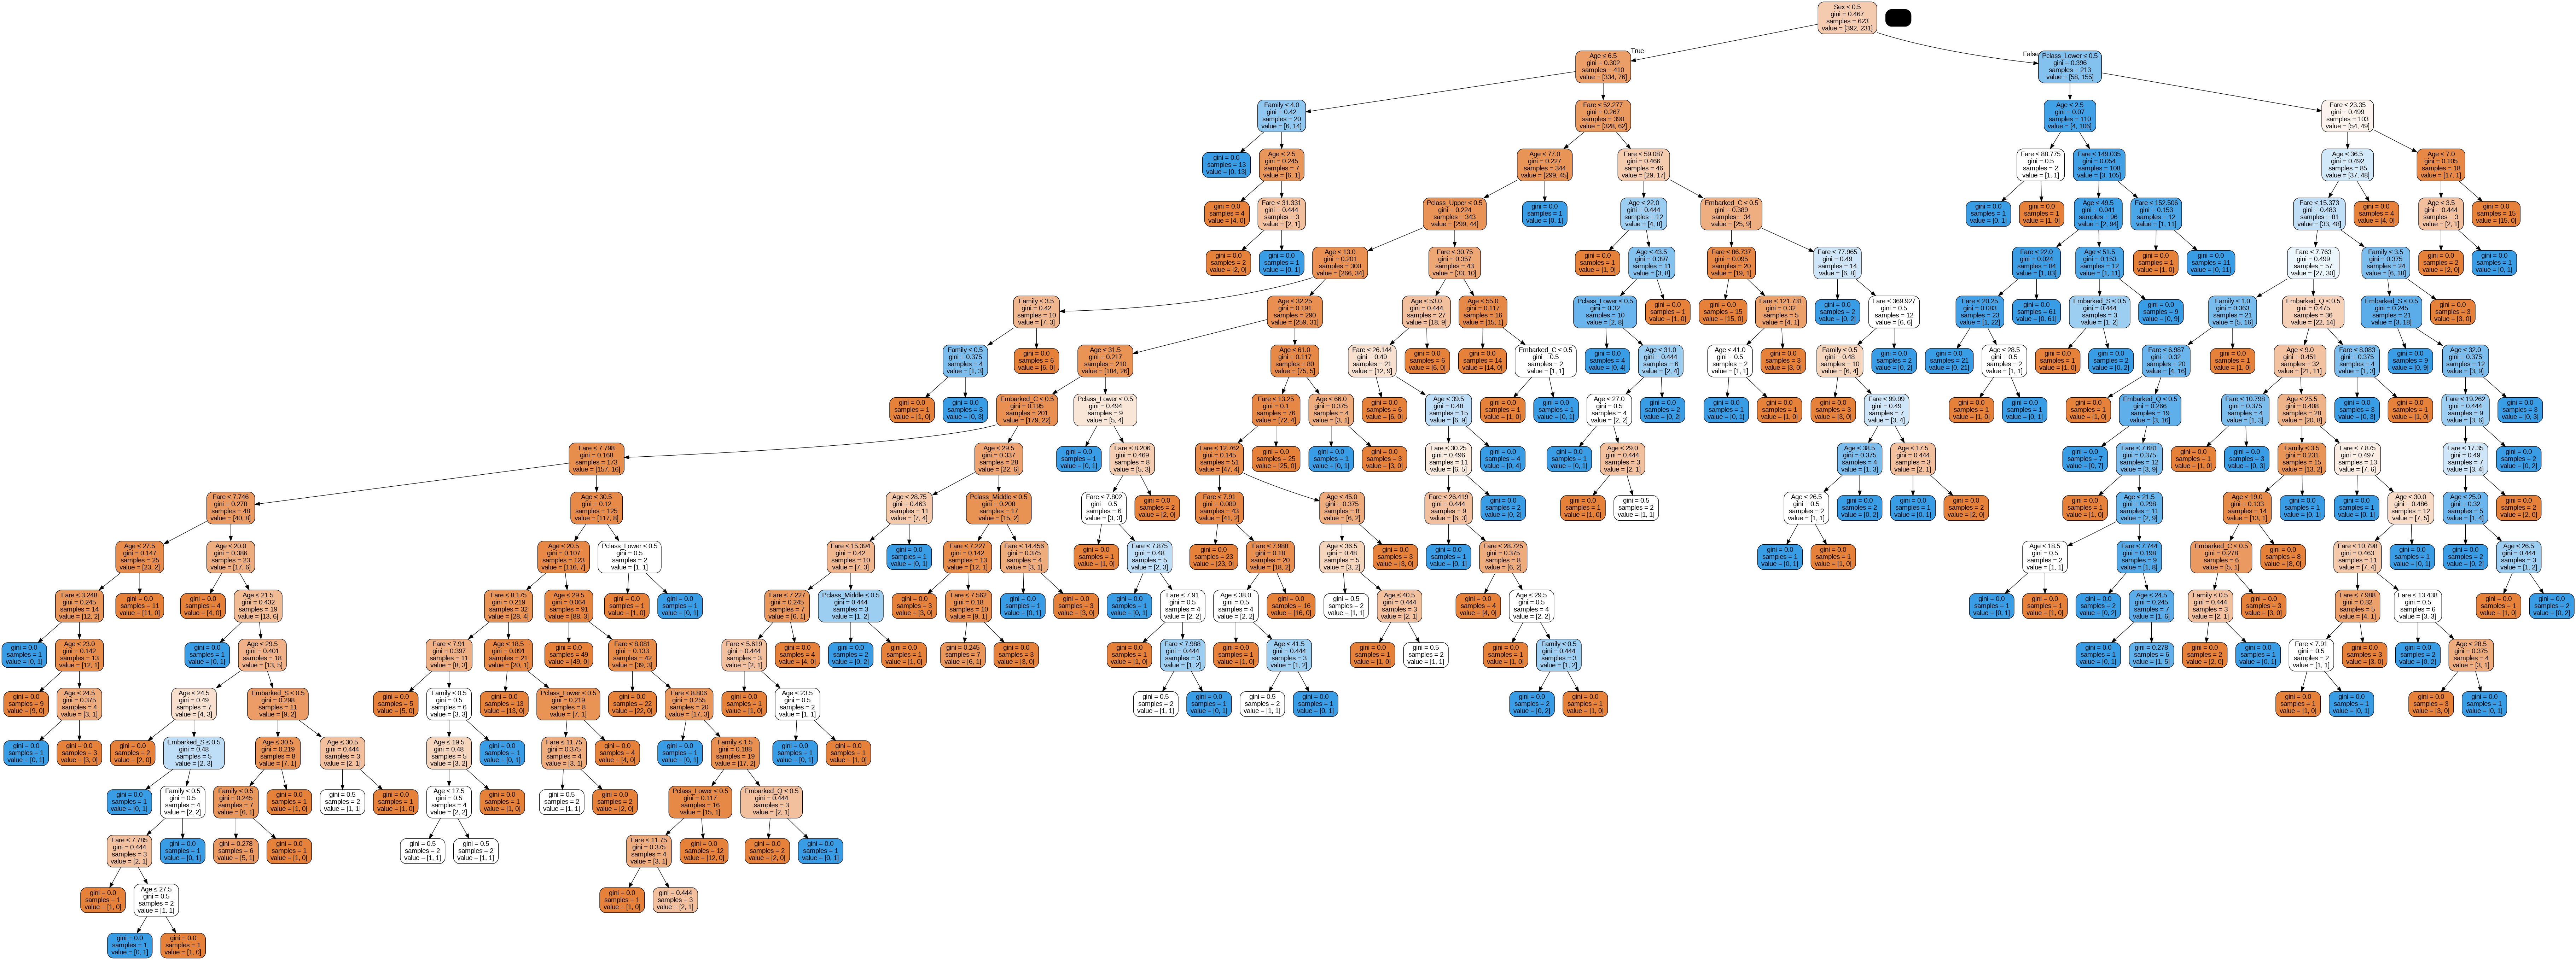

In [29]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

nomes_caracteristicas = X.columns.tolist()

# Exporte a árvore de decisão para um arquivo .dot com os nomes das características
dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=nomes_caracteristicas)


# Converta o arquivo .dot para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba a imagem da árvore de decisão (pode ser aberta no seu visualizador de imagem padrão)
Image(graph.create_png())

In [30]:
for i in range (2,10):
    # Divida os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Crie uma instância do DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth = i , random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

    # Treine o modelo usando o conjunto de treinamento
    clf.fit(X_train, Y_train)

    # Faça previsões no conjunto de teste
    Y_pred = clf.predict(X_test)

    # Avalie o desempenho do modelo (por exemplo, usando a acurácia)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Acurácia do modelo pra profundidade {i} é: {accuracy:.2f}')

Acurácia do modelo pra profundidade 2 é: 0.77
Acurácia do modelo pra profundidade 3 é: 0.81
Acurácia do modelo pra profundidade 4 é: 0.82
Acurácia do modelo pra profundidade 5 é: 0.80
Acurácia do modelo pra profundidade 6 é: 0.78
Acurácia do modelo pra profundidade 7 é: 0.79
Acurácia do modelo pra profundidade 8 é: 0.79
Acurácia do modelo pra profundidade 9 é: 0.78


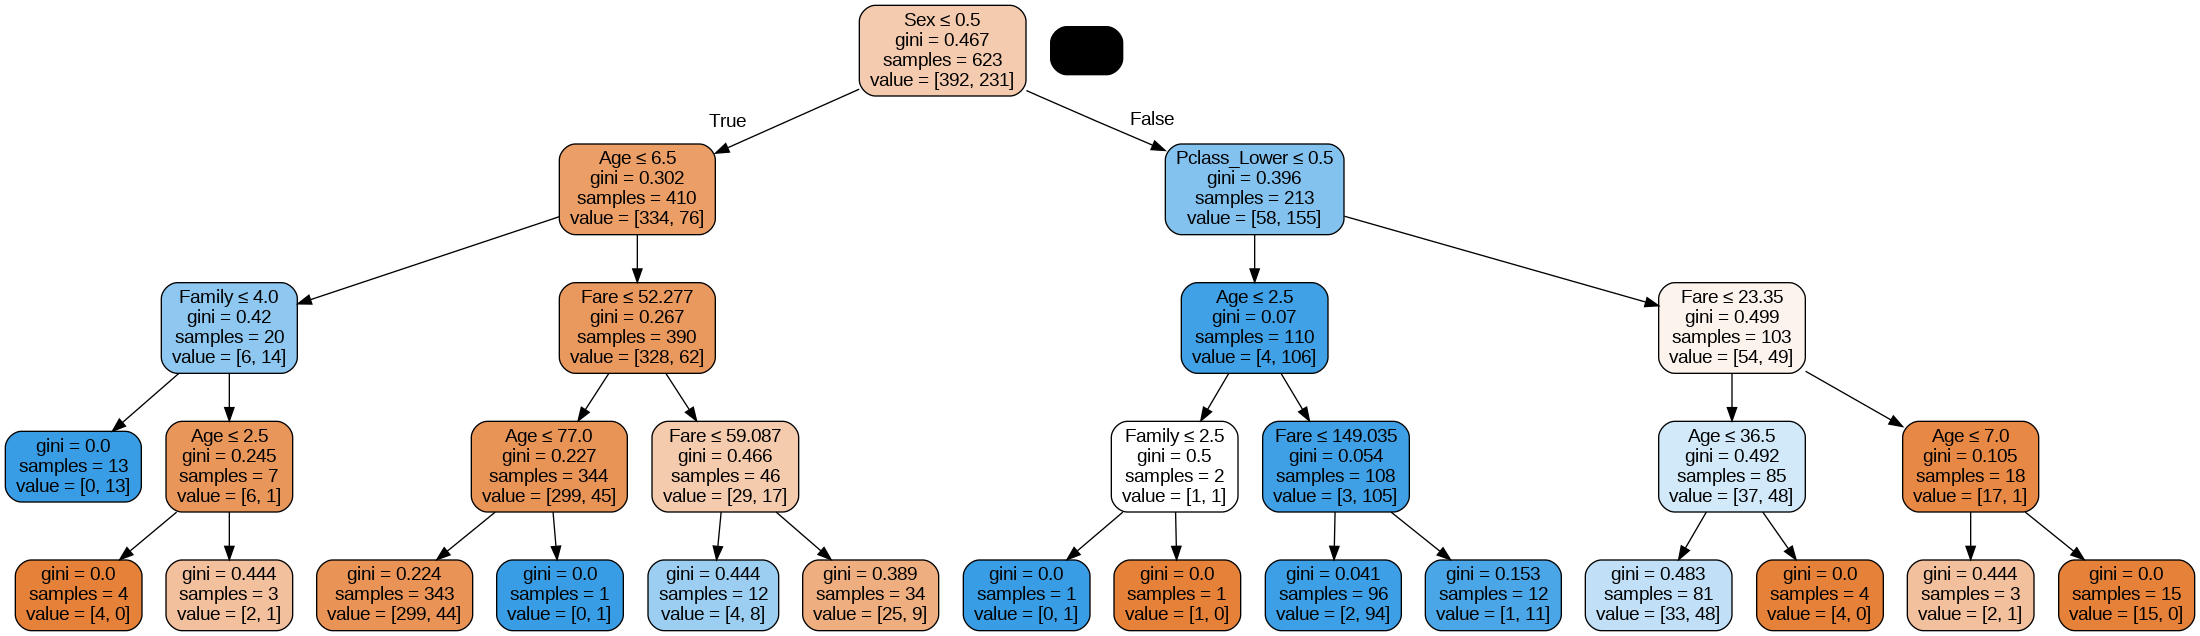

In [31]:
# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4 , random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=nomes_caracteristicas)


# Converta o arquivo .dot para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba a imagem da árvore de decisão (pode ser aberta no seu visualizador de imagem padrão)
Image(graph.create_png())

In [32]:
# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4 , random_state=42 , criterion = "gini")  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo pra profundidade {4} e gini é: {accuracy:.2f}')
clf = DecisionTreeClassifier(max_depth = 4 , random_state=42 , criterion = "entropy")  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo pra profundidade {4} e entropy é: {accuracy:.2f}')

Acurácia do modelo pra profundidade 4 e gini é: 0.82
Acurácia do modelo pra profundidade 4 e entropy é: 0.82


In [33]:
from sklearn.metrics import confusion_matrix

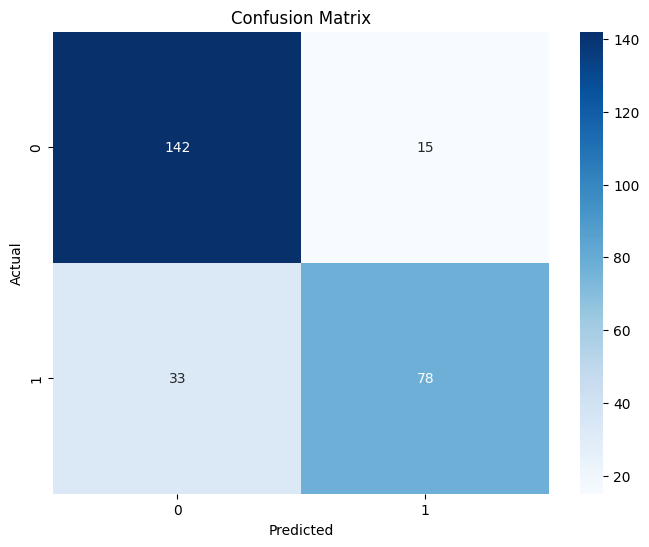

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
X = dados_balanceados.iloc[:, 1:]  # Seleciona todas as colunas, exceto a primeira, para os recursos
Y = dados_balanceados["Survived"]  # A variável de destino

for i in range (2,10):
    # Divida os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Crie uma instância do DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth = i , random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

    # Treine o modelo usando o conjunto de treinamento
    clf.fit(X_train, Y_train)

    # Faça previsões no conjunto de teste
    Y_pred = clf.predict(X_test)

    # Avalie o desempenho do modelo (por exemplo, usando a acurácia)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Acurácia do modelo pra profundidade balanceada {i} é: {accuracy:.2f}')

print(" ")
X = dados_filtered.iloc[:, 1:]  # Seleciona todas as colunas, exceto a primeira, para os recursos
Y = dados_filtered["Survived"]  # A variável de destino

for i in range (2,10):
    # Divida os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Crie uma instância do DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth = i , random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

    # Treine o modelo usando o conjunto de treinamento
    clf.fit(X_train, Y_train)

    # Faça previsões no conjunto de teste
    Y_pred = clf.predict(X_test)

    # Avalie o desempenho do modelo (por exemplo, usando a acurácia)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Acurácia do modelo pra profundidade apenas filtrada {i} é: {accuracy:.2f}')



Acurácia do modelo pra profundidade balanceada 2 é: 0.77
Acurácia do modelo pra profundidade balanceada 3 é: 0.76
Acurácia do modelo pra profundidade balanceada 4 é: 0.78
Acurácia do modelo pra profundidade balanceada 5 é: 0.77
Acurácia do modelo pra profundidade balanceada 6 é: 0.76
Acurácia do modelo pra profundidade balanceada 7 é: 0.76
Acurácia do modelo pra profundidade balanceada 8 é: 0.80
Acurácia do modelo pra profundidade balanceada 9 é: 0.80
 
Acurácia do modelo pra profundidade apenas filtrada 2 é: 0.77
Acurácia do modelo pra profundidade apenas filtrada 3 é: 0.81
Acurácia do modelo pra profundidade apenas filtrada 4 é: 0.82
Acurácia do modelo pra profundidade apenas filtrada 5 é: 0.79
Acurácia do modelo pra profundidade apenas filtrada 6 é: 0.77
Acurácia do modelo pra profundidade apenas filtrada 7 é: 0.80
Acurácia do modelo pra profundidade apenas filtrada 8 é: 0.74
Acurácia do modelo pra profundidade apenas filtrada 9 é: 0.75


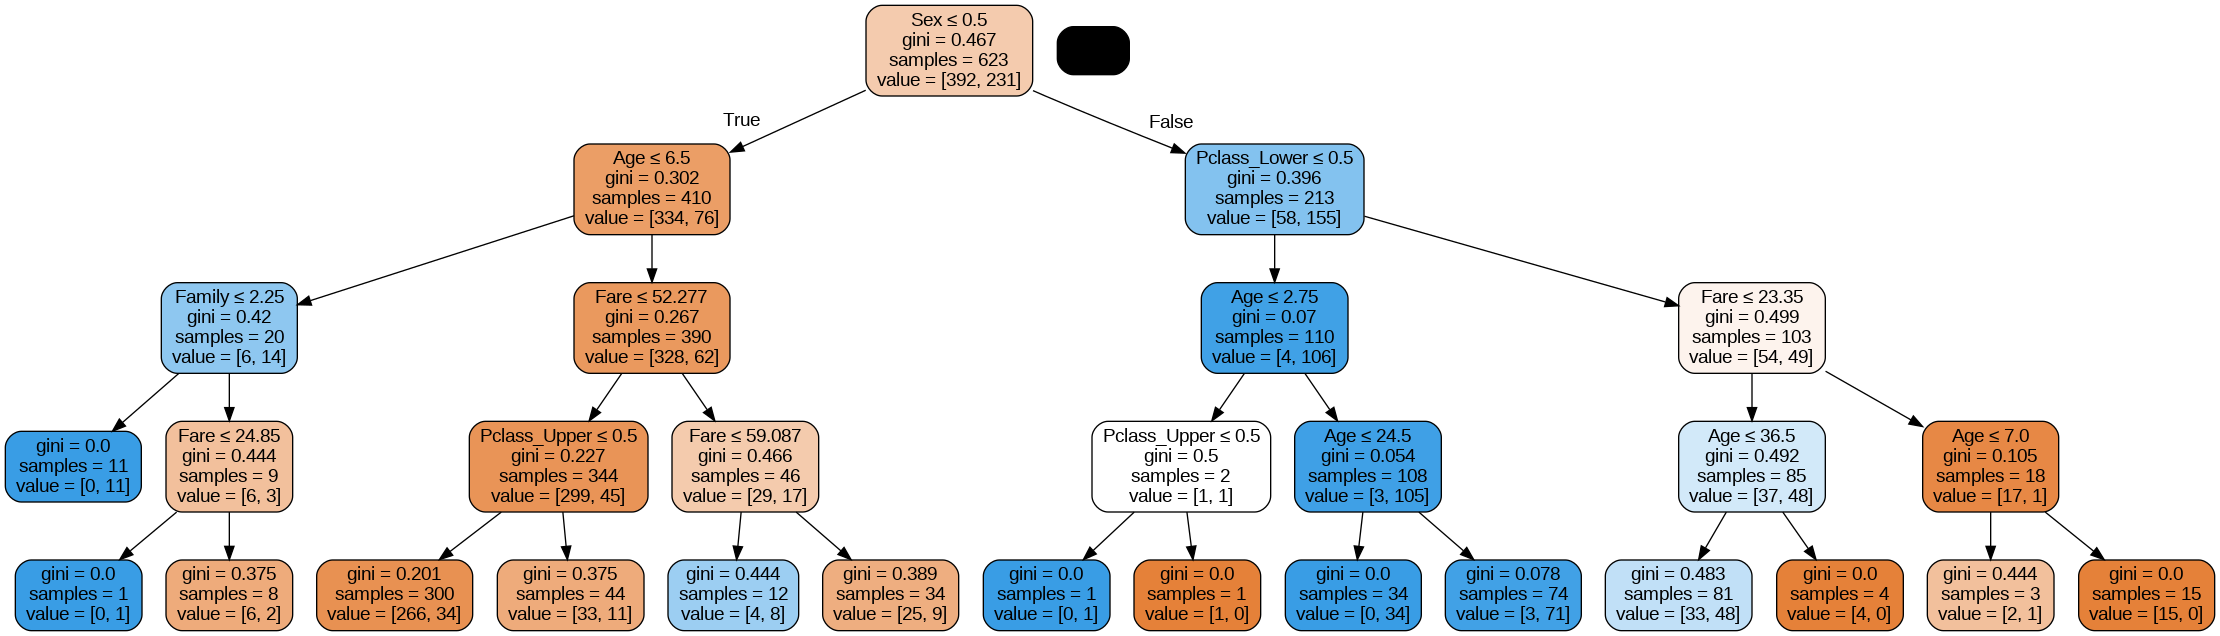

In [36]:
# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4 , random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=nomes_caracteristicas)


# Converta o arquivo .dot para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba a imagem da árvore de decisão (pode ser aberta no seu visualizador de imagem padrão)
Image(graph.create_png())

In [37]:
for i in range(2, 11):

    # Divida os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Crie uma instância do DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth = 4 , random_state=42, max_leaf_nodes=i)  # Você pode ajustar hiperparâmetros, se necessário

    # Treine o modelo usando o conjunto de treinamento
    clf.fit(X_train, Y_train)

    # Faça previsões no conjunto de teste
    Y_pred = clf.predict(X_test)

    # Avalie o desempenho do modelo (por exemplo, usando a acurácia)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Acurácia do modelo pra numero de folhas {i} é: {accuracy:.2f}')

Acurácia do modelo pra numero de folhas 2 é: 0.79
Acurácia do modelo pra numero de folhas 3 é: 0.77
Acurácia do modelo pra numero de folhas 4 é: 0.77
Acurácia do modelo pra numero de folhas 5 é: 0.81
Acurácia do modelo pra numero de folhas 6 é: 0.81
Acurácia do modelo pra numero de folhas 7 é: 0.81
Acurácia do modelo pra numero de folhas 8 é: 0.82
Acurácia do modelo pra numero de folhas 9 é: 0.82
Acurácia do modelo pra numero de folhas 10 é: 0.82


In [38]:
# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo pra profundidade {4} e entropy é: {accuracy:.2f}')

Acurácia do modelo pra profundidade 4 e entropy é: 0.82


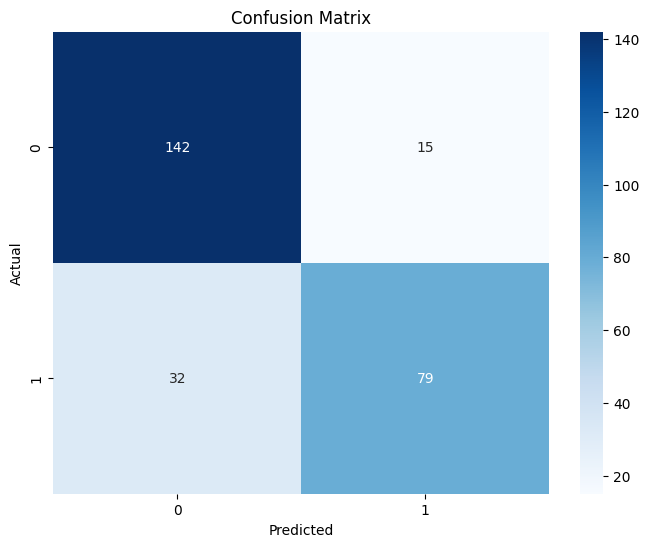

In [39]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score


# Separar as colunas de alvo (y) e características (X)
X = dados_filtered.iloc[:, 1:]  # Restantes colunas são características
y = dados_filtered['Survived']  # Coluna alvo

# Criar uma instância do classificador de árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, criterion='gini')  # Substitua com seus hiperparâmetros

# Realizar validação cruzada (por exemplo, 5-fold)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Use a métrica adequada para o seu problema

# Imprimir os resultados
print("Acurácia média: {:.2f}%".format(scores.mean() * 100))
print("Desvio padrão: {:.2f}".format(scores.std()))


Acurácia média: 79.58%
Desvio padrão: 0.05


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar as colunas de alvo (y) e características (X)
X = dados_filtered.iloc[:, 1:]  # Restantes colunas são características
y = dados_filtered['Survived']  # Coluna alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variar os valores de max_depth em um loop de 2 a 10
for max_depth in range(2, 11):
    # Criar uma instância do classificador Random Forest com o max_depth atual
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    # Treinar o modelo no conjunto de treinamento
    clf.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = clf.predict(X_test)

    # Avaliar o desempenho do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurácia do Random Forest (max_depth={}): {:.2f}%".format(max_depth, accuracy * 100))

    # Exibir um relatório de classificação detalhado
    print("\nRelatório de Classificação (max_depth={}):".format(max_depth))
    print(classification_report(y_test, y_pred))


Acurácia do Random Forest (max_depth=2): 78.21%

Relatório de Classificação (max_depth=2):
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       105
           1       0.91      0.53      0.67        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.75       179
weighted avg       0.81      0.78      0.77       179

Acurácia do Random Forest (max_depth=3): 81.01%

Relatório de Classificação (max_depth=3):
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.66      0.74        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Acurácia do Random Forest (max_depth=4): 80.45%

Relatório de Classificação (max_depth=4):
              precision    recall  f1-score   support

           0      